In [1]:
"""
直立长方体总磁场异常正演
直立长方体(具有剩磁和退磁)
"""
import matplotlib.pyplot as plt
from geoist import gridder
from geoist.inversion import geometry
from geoist.pfm import prism, giutils
from geoist.vis import giplt


In [2]:
#直立长方体模型参数设置
inc, dec = 30, -15
bounds = [-5000, 5000, -5000, 5000, 0, 5000]
model = [
    geometry.Prism(-4000, -3000, -4000, -3000, 0, 2000,
                 {'magnetization': giutils.ang2vec(1, inc, dec)}),
    geometry.Prism(-1000, 1000, -1000, 1000, 0, 2000,
                 {'magnetization': giutils.ang2vec(1, inc, dec)}),
    geometry.Prism(2000, 4000, 3000, 4000, 0, 2000,
                 {'magnetization': giutils.ang2vec(3, -10, 45)})]

In [3]:
# 观测数据
shape = (200, 200)
area = bounds[:4]
xp, yp, zp = gridder.regular(area, shape, z=-500)

In [4]:
# 计算总磁场异常
tf = prism.tf(xp, yp, zp, model, inc, dec)

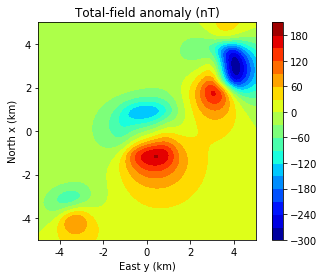

In [5]:
# 画图
plt.figure()
plt.title("Total-field anomaly (nT)")
plt.axis('scaled')
giplt.contourf(yp, xp, tf, shape, 15)
plt.colorbar()
plt.xlabel('East y (km)')
plt.ylabel('North x (km)')
giplt.m2km()
plt.show()